In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

In [4]:
# plt.rcParams.update(plt.rcParamsDefault)
mpl.rcParams['figure.dpi']= 300
mpl.rcParams['font.size'] = 40

# Exercise 2

In [3]:
data = pd.read_csv("O0.csv", header=None)
data_O3 = pd.read_csv("O3-fno-tree-vectorize.csv", header=None)
data_O3ff = pd.read_csv("O3-ffast-math.csv", header=None)

In [4]:
np_data = np.array(data.values)
np_data_O3 = np.array(data_O3.values)
np_data_O3ff = np.array(data_O3ff.values)

In [5]:
np_data_runs = np_data[:, 1:]
np_data_O3_runs = np_data_O3[:, 1:]
np_data_O3ff_runs = np_data_O3ff[:, 1:]
runs = np_data[:, :1].flatten()

In [6]:
# Median berechnen
np_data_median = np.median(np_data_runs, axis=1)
np_data_O3_median = np.median(np_data_O3_runs, axis=1)
np_data_O3ff_median = np.median(np_data_O3ff_runs, axis=1)

In [39]:
np_data_O3ff_median

array([3.2317495, 3.103774 , 2.988129 , 3.1431795, 2.891908 , 2.9152885,
       2.4689905, 2.148354 , 2.009591 , 1.836321 , 1.6236745, 1.564125 ,
       1.550514 , 1.551056 , 1.54339  , 1.5199965, 1.5372305, 1.5331655,
       1.533681 , 1.5046885])

## Plot

TODO:
- Horizontal y-label
- Different Title
- Attractive font (sans serif, Calibri, Helvetica, Gill Sans MT)
    -> try using the font manager?
- (Optional) label at lines?

In [11]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


['Arial', 'Liberation Sans', 'DejaVu Sans', 'Bitstream Vera Sans', 'sans-serif']
40.0


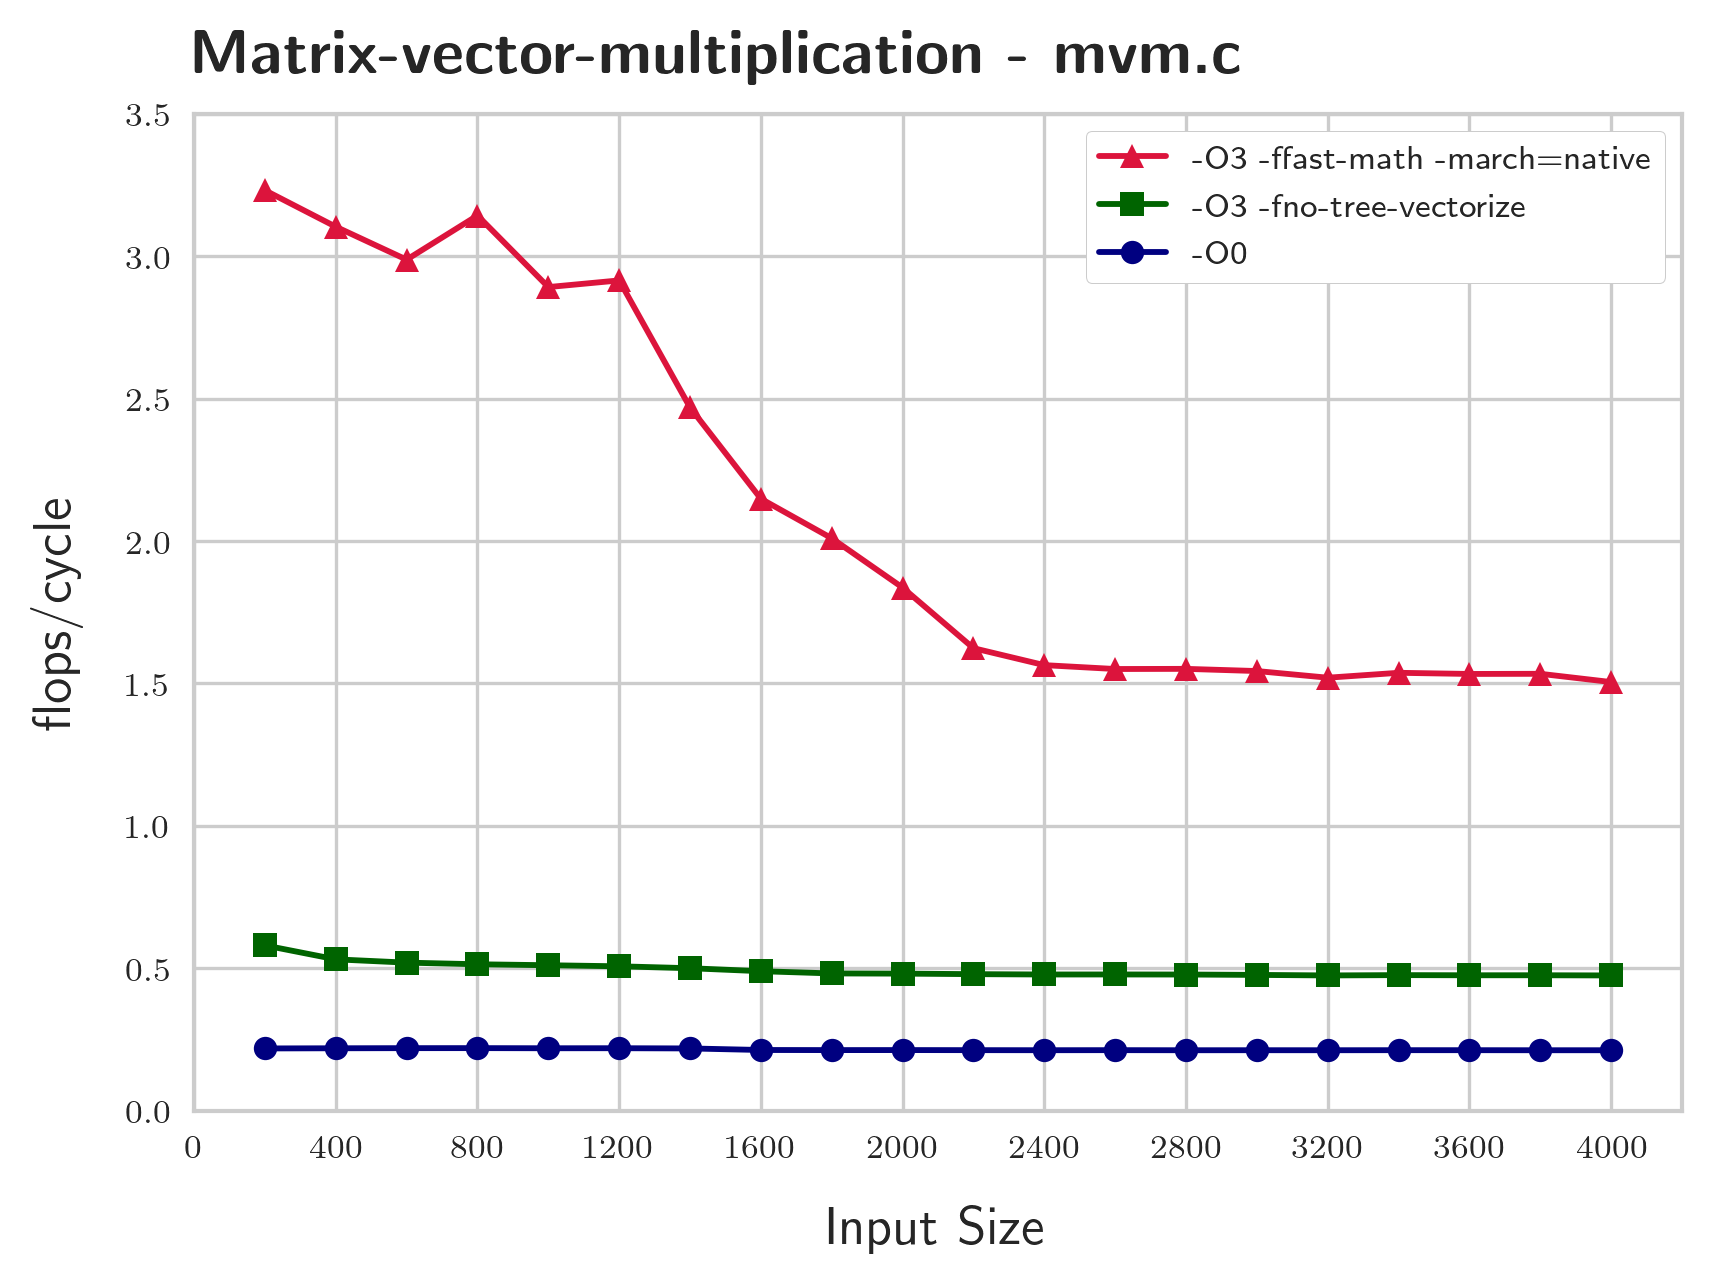

In [56]:
# plt.rc('font',**{'family':'sans-serif', 'size':15, 'sans-serif':['DejaVu Sans']})
plt.rc('text', usetex=True)

# Style of plot
plt.style.use(['seaborn-whitegrid', 'seaborn-paper'])

# Add lines to plot
plt.plot(runs, np_data_O3ff_median, '-^', color='crimson', label="-O3 -ffast-math -march=native",)
plt.plot(runs, np_data_O3_median, '-s', color='darkgreen', label="-O3 -fno-tree-vectorize")
plt.plot(runs, np_data_median, '-o', color='navy', label="-O0")

# Set x, y labels and title
plt.ylabel('flops/cycle', labelpad=10, fontsize=13)
plt.xlabel('Input Size', labelpad=10, fontsize=13)
plt.title(r'\textbf{Matrix-vector-multiplication - mvm.c}', loc='left', pad=10, fontsize=15)
# plt.title(r'{\fontsize{30pt}{3em}\selectfont{}{Mean WRFv3.5 LHF\r}{\fontsize{18pt}{3em}\selectfont{}(September 16 - October 30, 2012)}')
# plt.title(r'{\fontfamily{ptm}\selectfont \textbf{Performance}}[Test]', loc='left', fontsize=20, pad=20)
# plt.title(r'{\fontsize{20}{48} \selectfont \textbf{Performance}}\newline    Test', loc='left')

# Setting ticks and limits
plt.ylim(0, 3.5)

plt.xticks(range(0, 4200, 400))
plt.xlim(0, 4200)

# text is left-aligned
# plt.text(2,4,'This text starts at point (2,4)')

# Legend
plt.legend(loc='upper right', frameon=True, framealpha=1)

# Labels at lines instead
# TODO

# fig = plt.figure()
ax = plt.gca()

'''
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
'''

print(mpl.rcParams['font.sans-serif'])
print(mpl.rcParams['font.size'])

plt.show()

In [ ]:
# L1 Cache 32KB -> n=62-63
# L2 Cache 256KB -> n=178
# L3 Cache 16MB -> n=1413

# We compile with vectorized

In [9]:
# t = np.linspace(0.0, 1.0, 100)
# s = np.cos(4 * np.pi * t) + 2

# fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
# ax.plot(t, s)

# ax.set_xlabel(r'\textbf{time (s)}')
# ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
# ax.set_title(r'\TeX\ is Number  '
#              r'{\fontfamily{ptm}\selectfont Text in Times} Test normal?', fontsize=16, color='r')
# plt.show()

In [10]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

# Exercise 3

In [10]:
data_3 = pd.read_csv("Ex3/output.csv", header=None)

In [11]:
np_data_3 = np.array(data_3.values)

In [12]:
np_data_3_runs = np_data_3[:, 1:]
exp = np_data_3[:, :1].flatten()

In [13]:
# Median berechnen
np_data_3_median = np.median(np_data_3_runs, axis=1)

## Plot

Then, for all two-power sizes n = 24, . . . , 223 create a performance plot with n on the x-axis (choose logarithmic scale) and performance (in flops/cycle) on the y-axis. Randomly initialize all arrays. For all n repeat your measurements 30 times reporting the median in your plot. Compile your code using GCC with flags -O3 and -march=native.

In [44]:
# y = np.array([5.2, 10.2, 13.7, 16.6, 20.0, 27.6])
# x = np.array([1, 10, 50, 100, 200, 500])

en_de = np.array([1.2, 2.8, 5.2, 6.5, 9.5, 15.0, 16.4])
en_fr = np.array([5.2, 10.2, 13.7, 16.6, 20.0, 27.6, 33.5])
en_es = np.array([1, 1.8, 3.2, 4.3, 6.4, 10.6, 12.9])

# en_de = np.array([1.2, 2.8, 5.2, 6.5, 9.5, 15.0])
# en_fr = np.array([5.2, 10.2, 13.7, 16.6, 20.0, 27.6])
# en_es = np.array([1, 1.8, 3.2, 4.3, 6.4, 10.6])

x = np.array([1, 10, 50, 100, 200, 500, 1000])

In [19]:
np.arange(0, 1200, 200)

array([   0,  200,  400,  600,  800, 1000])

In [ ]:
np.linspace(2.0, 3.0, num=5)

In [26]:
a = [pow(10, i) for i in range(10)]
a

[1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]

['Arial', 'Liberation Sans', 'DejaVu Sans', 'Bitstream Vera Sans', 'sans-serif']
40.0


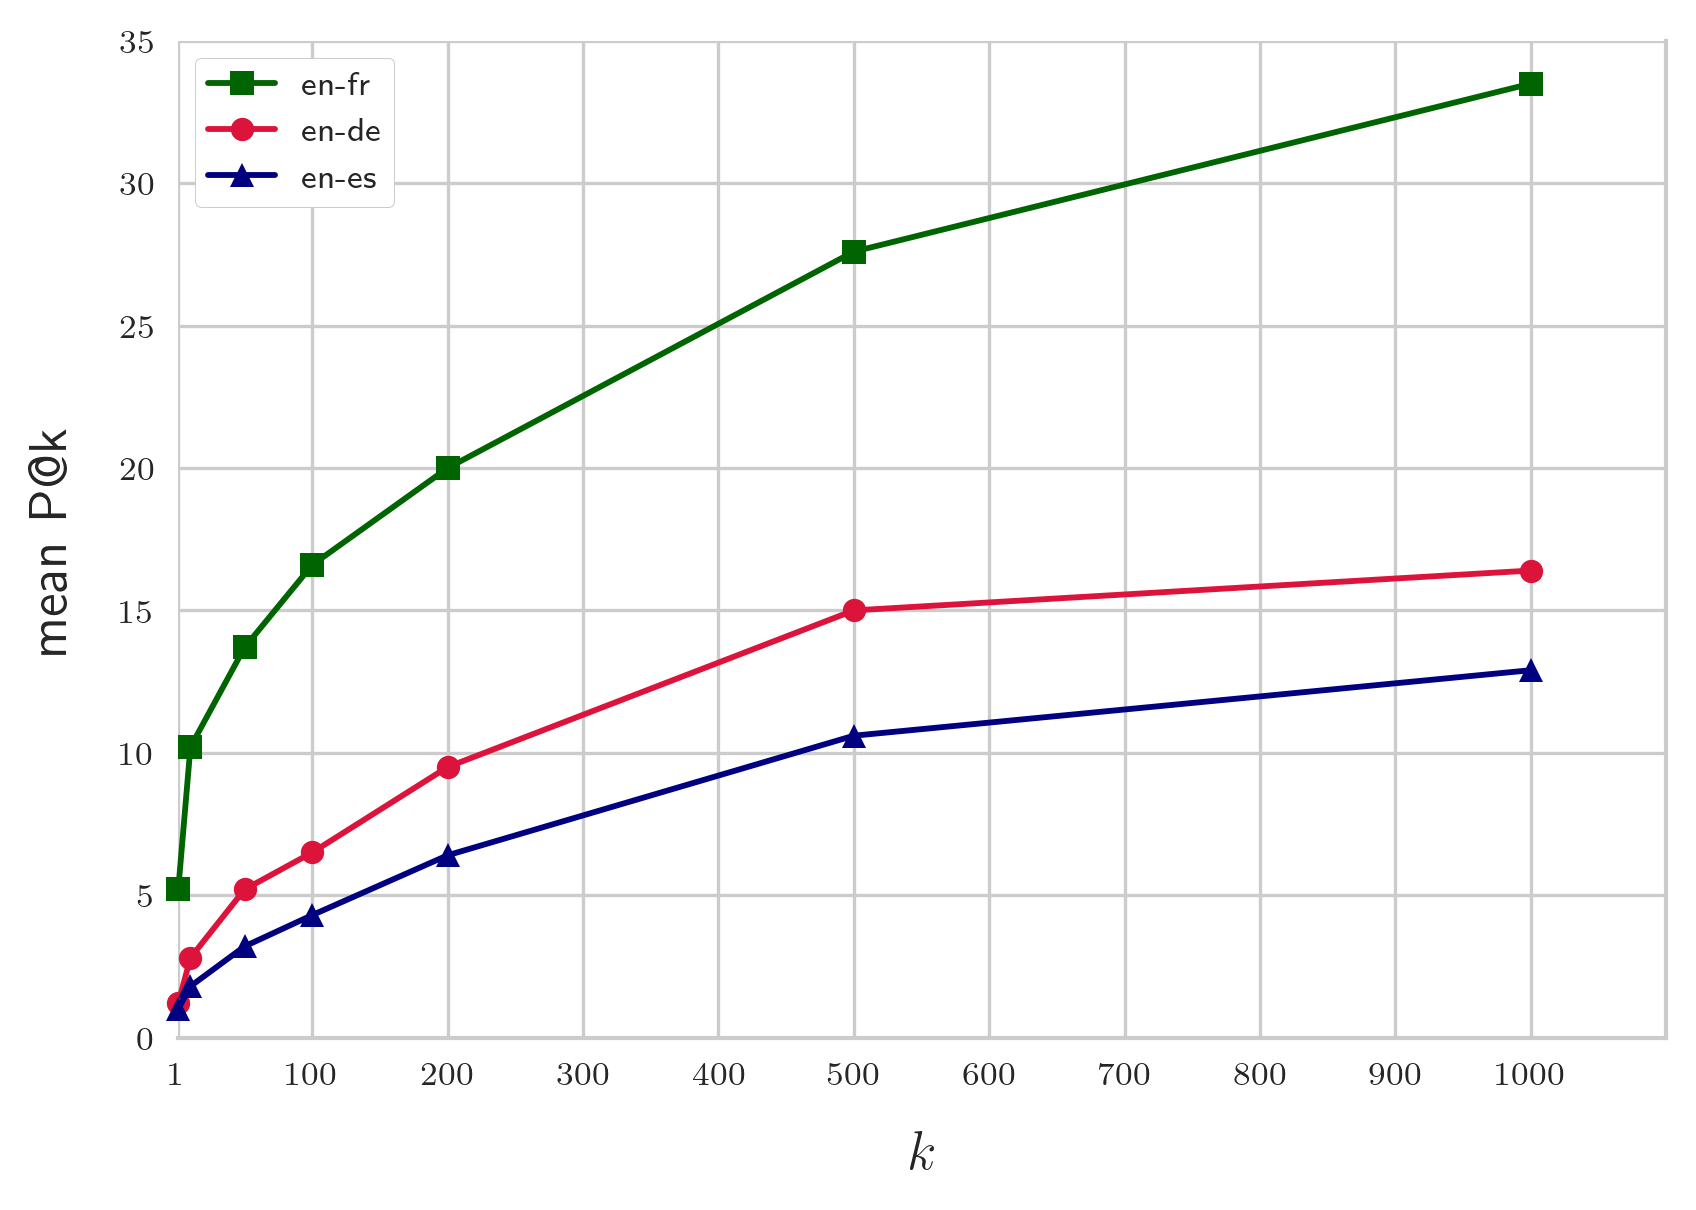

In [48]:
# plt.rc('font',**{'family':'sans-serif', 'size':15, 'sans-serif':['DejaVu Sans']})
plt.rc('text', usetex=True)
# plt.rc('axes', axisbelow=True)

# Style of plot
plt.style.use(['seaborn-whitegrid', 'seaborn-paper'])

# Add lines to plot
# plt.plot(x, y, '-o', color='navy', clip_on=False)

# Add lines to plot
plt.plot(x, en_fr, '-s', color='darkgreen', label="en-fr", clip_on=False)
plt.plot(x, en_de, '-o', color='crimson', label="en-de", clip_on=False)
plt.plot(x, en_es, '-^', color='navy', label="en-es", clip_on=False)

# Set x, y labels and title
plt.xlabel('$k$', labelpad=10, fontsize=13)
plt.ylabel('mean P@k', labelpad=10, fontsize=13)
# plt.title(r'\textbf{combine.c}', loc='left', pad=10, fontsize=15)
# plt.title(r'{\fontsize{30pt}{3em}\selectfont{}{Mean WRFv3.5 LHF\r}{\fontsize{18pt}{3em}\selectfont{}(September 16 - October 30, 2012)}')
# plt.title(r'{\fontfamily{ptm}\selectfont \textbf{Performance}}[Test]', loc='left', fontsize=20, pad=20)
# plt.title(r'{\fontsize{20}{48} \selectfont \textbf{Performance}}\newline    Test', loc='left')

# Setting x tick

rang = np.arange(0, 1100, 100)
rang[0] = 1
plt.xticks(rang)

plt.ylim(0, 35)
plt.xlim(1, 1100)

# text is left-aligned
# plt.text(2,4,'This text starts at point (2,4)')

# Legend
plt.legend(loc='upper left', frameon=True, framealpha=1)

# Labels at lines instead
# TODO

# fig = plt.figure()
ax = plt.gca()
ax.grid(zorder=0)

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
'''
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
'''

print(mpl.rcParams['font.sans-serif'])
print(mpl.rcParams['font.size'])

plt.show()

In [39]:
# L1 Cache 32KB -> n=13
# L2 Cache 256KB -> n=15.9 (or with L1 in L2 Cache: ~15.7)
# L3 Cache 16MB -> n=21.9 (or ~21.9)

# We compile with vectorized